Loading the dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("hotel_bookings.csv")


Convert data type to suitable for Analysis

In [5]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date_year'] = df['arrival_date_year'].astype(int)
df['arrival_date_week_number'] = df['arrival_date_week_number'].astype(int)
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype(int)
df['is_canceled'] = df['is_canceled'].astype(int)
df['is_repeated_guest'] = df['is_repeated_guest'].astype(int)
df['lead_time'] = df['lead_time'].astype(int)


top 5 row & column

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
categorical_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                    'reserved_room_type', 'assigned_room_type', 'deposit_type',
                    'customer_type', 'reservation_status', 'arrival_date_month']
df[categorical_cols] = df[categorical_cols].astype('category')


Drop Duplicate

In [8]:
df.drop_duplicates(inplace=True)


Check Outlier

In [9]:
df = df[df['adr'] <= df['adr'].quantile(0.99)]  # remove extreme ADR values


Handle missing value

In [13]:
# Handle missing values
df['children'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)
df['country'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2627309294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
/tmp/ipython-input-2627309294.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

What is the average lead time for bookings?

In [15]:
avg_lead_time = df['lead_time'].mean()
print("Average Lead Time:", round(avg_lead_time, 2))


Average Lead Time: 79.99


What is the distribution of bookings by hotel type?

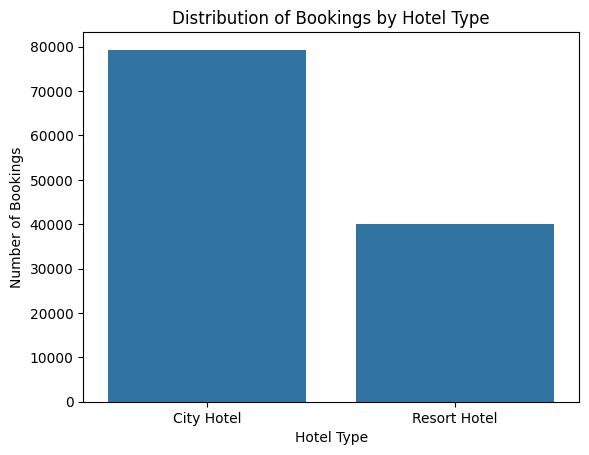

In [18]:
hotel_counts = df['hotel'].value_counts()
sns.barplot(x=hotel_counts.index, y=hotel_counts.values)
plt.title("Distribution of Bookings by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.show()


How many bookings were canceled?

In [19]:
total_cancellations = df['is_canceled'].sum()
print("Total Cancellations:", total_cancellations)


Total Cancellations: 44224


What is the most common arrival month for bookings?

Most Common Arrival Month: August


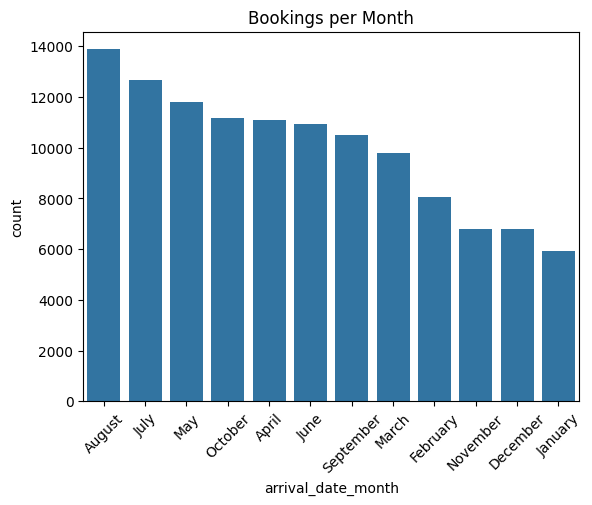

In [20]:
most_common_month = df['arrival_date_month'].mode()[0]
print("Most Common Arrival Month:", most_common_month)

sns.countplot(x='arrival_date_month', data=df, order=df['arrival_date_month'].value_counts().index)
plt.title("Bookings per Month")
plt.xticks(rotation=45)
plt.show()


What is the average number of special requests per booking?

In [21]:
avg_special_requests = df['total_of_special_requests'].mean()
print("Average Special Requests per Booking:", round(avg_special_requests, 2))


Average Special Requests per Booking: 0.57


Which country has the highest number of bookings?

Country with Highest Bookings: PRT


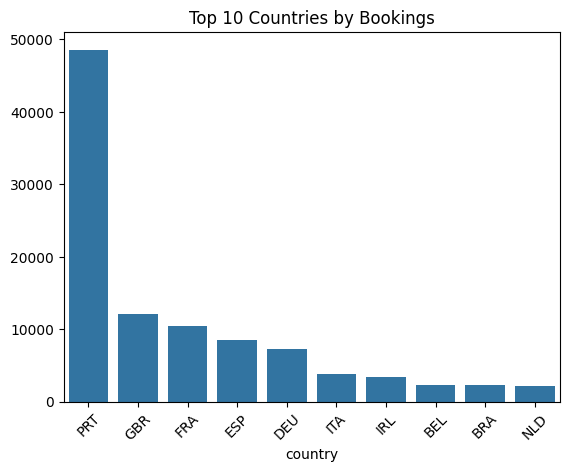

In [22]:
top_country = df['country'].value_counts().idxmax()
print("Country with Highest Bookings:", top_country)

top_10 = df['country'].value_counts().head(10)
sns.barplot(x=top_10.index, y=top_10.values)
plt.title("Top 10 Countries by Bookings")
plt.xticks(rotation=45)
plt.show()


What is the average daily rate (ADR) for each hotel type?

In [23]:
avg_adr_per_hotel = df.groupby('hotel')['adr'].mean()
print(avg_adr_per_hotel)


hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64


What percentage of guests required car parking spaces?

In [24]:
parking_percentage = (df[df['required_car_parking_spaces'] > 0].shape[0] / df.shape[0]) * 100
print("Percentage of Bookings with Parking Spaces:", round(parking_percentage, 2), "%")


Percentage of Bookings with Parking Spaces: 6.21 %


What is the average stay duration in week nights and weekend nights?

In [25]:
avg_week = df['stays_in_week_nights'].mean()
avg_weekend = df['stays_in_weekend_nights'].mean()
print("Average Week Nights:", round(avg_week, 2))
print("Average Weekend Nights:", round(avg_weekend, 2))


Average Week Nights: 2.5
Average Weekend Nights: 0.93


How many bookings were made through travel agents?

In [26]:
agent_bookings = df[df['agent'] != 0].shape[0]
print("Bookings through Travel Agents:", agent_bookings)


Bookings through Travel Agents: 119390


                  MEDIUM LEVEL QWESTIONS

Cancellation rate for each hotel type

hotel
City Hotel      41.726963
Resort Hotel    27.763355
Name: is_canceled, dtype: float64


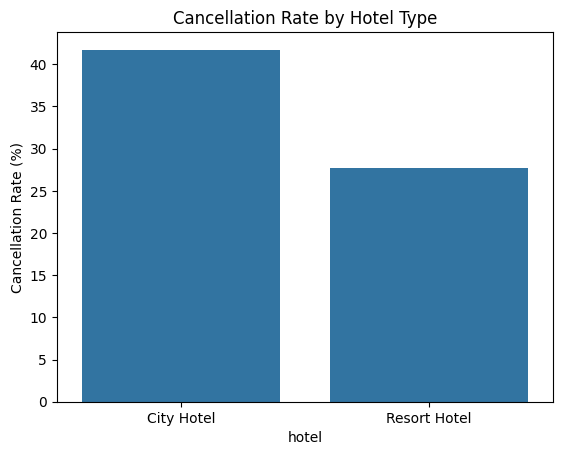

In [27]:
cancel_rate = df.groupby('hotel')['is_canceled'].mean() * 100
print(cancel_rate)
sns.barplot(x=cancel_rate.index, y=cancel_rate.values)
plt.title("Cancellation Rate by Hotel Type")
plt.ylabel("Cancellation Rate (%)")
plt.show()


Average ADR per market segment

market_segment
Online TA        117.197063
Direct           115.445175
Aviation         100.142110
Offline TA/TO     87.354783
Groups            79.479472
Corporate         69.358952
Undefined         15.000000
Complementary      2.886366
Name: adr, dtype: float64


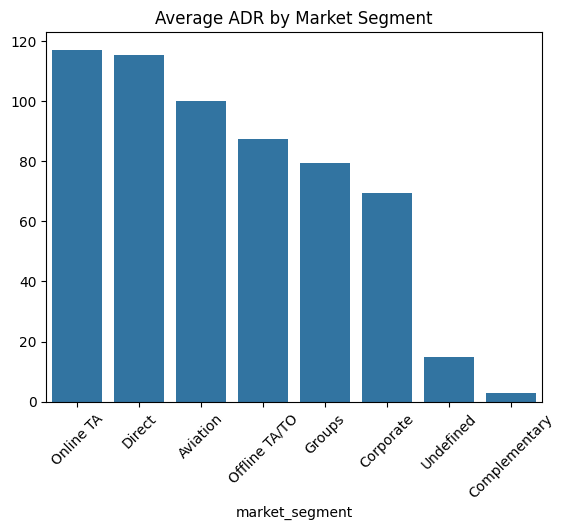

In [28]:
avg_adr_segment = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)
print(avg_adr_segment)
sns.barplot(x=avg_adr_segment.index, y=avg_adr_segment.values)
plt.title("Average ADR by Market Segment")
plt.xticks(rotation=45)
plt.show()


Relationship between lead time and cancellation rate

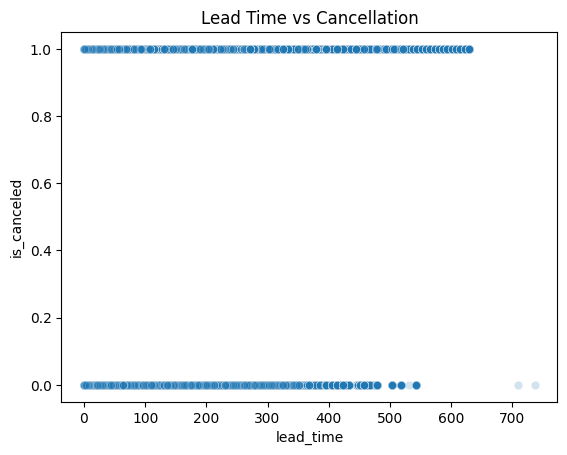

Correlation between Lead Time and Cancellation: 0.29


In [29]:
sns.scatterplot(x='lead_time', y='is_canceled', data=df, alpha=0.2)
plt.title("Lead Time vs Cancellation")
plt.show()

correlation = df['lead_time'].corr(df['is_canceled'])
print("Correlation between Lead Time and Cancellation:", round(correlation, 2))


Which distribution channel has the highest number of bookings?

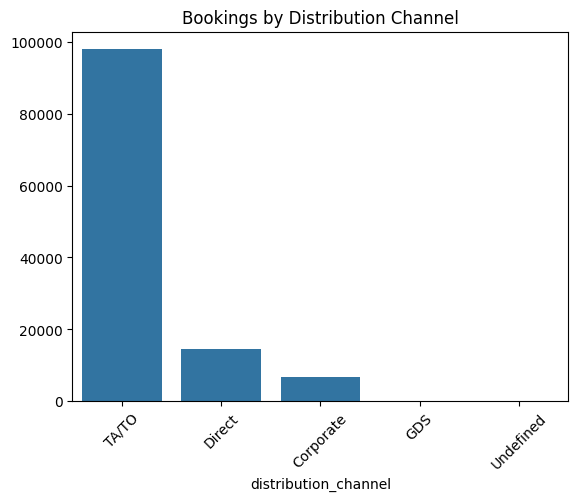

In [30]:
channel_counts = df['distribution_channel'].value_counts()
sns.barplot(x=channel_counts.index, y=channel_counts.values)
plt.title("Bookings by Distribution Channel")
plt.xticks(rotation=45)
plt.show()


Average number of previous cancellations by hotel type

In [31]:
prev_cancel = df.groupby('hotel')['previous_cancellations'].mean()
print(prev_cancel)


hotel
City Hotel      0.079743
Resort Hotel    0.101722
Name: previous_cancellations, dtype: float64


Trend of ADR over the years

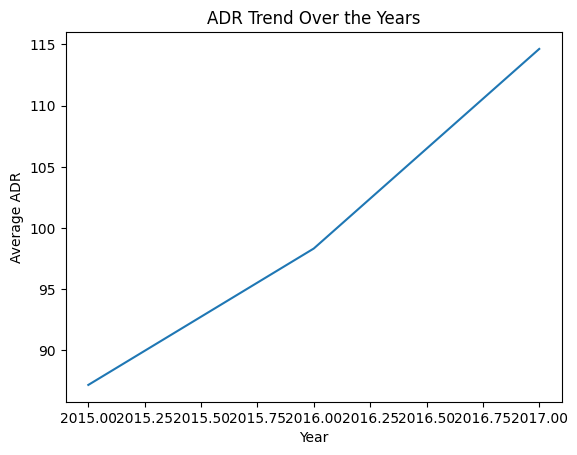

In [32]:
adr_trend = df.groupby('arrival_date_year')['adr'].mean()
sns.lineplot(x=adr_trend.index, y=adr_trend.values)
plt.title("ADR Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Average ADR")
plt.show()


Which month has the highest revenue?

arrival_date_month
August       1944327.60
July         1605263.03
May          1281628.83
June         1276277.11
April        1113122.58
September    1103861.80
October       981063.09
March         790176.45
February      593661.80
December      549700.54
November      501362.97
January       417171.80
Name: adr, dtype: float64


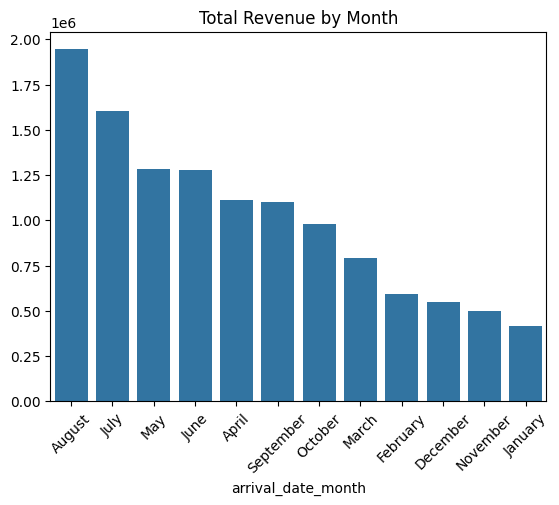

In [33]:
revenue_by_month = df.groupby('arrival_date_month')['adr'].sum().sort_values(ascending=False)
print(revenue_by_month)
sns.barplot(x=revenue_by_month.index, y=revenue_by_month.values)
plt.title("Total Revenue by Month")
plt.xticks(rotation=45)
plt.show()


Impact of special requests on ADR

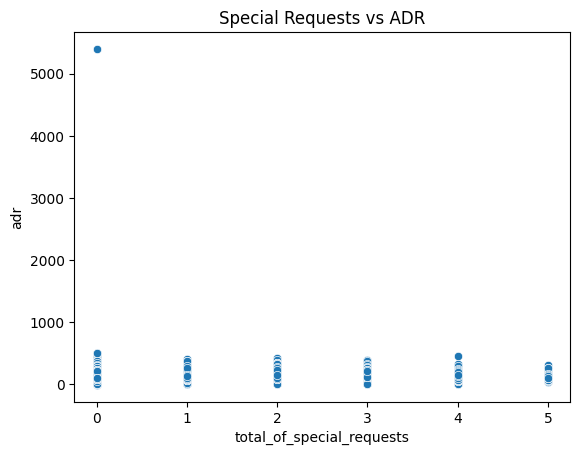

Correlation between Special Requests and ADR: 0.17


In [34]:
sns.scatterplot(x='total_of_special_requests', y='adr', data=df)
plt.title("Special Requests vs ADR")
plt.show()

correlation = df['total_of_special_requests'].corr(df['adr'])
print("Correlation between Special Requests and ADR:", round(correlation, 2))


Average stay duration for repeated vs new guests

is_repeated_guest
0    3.477410
1    1.925984
Name: total_stay, dtype: float64


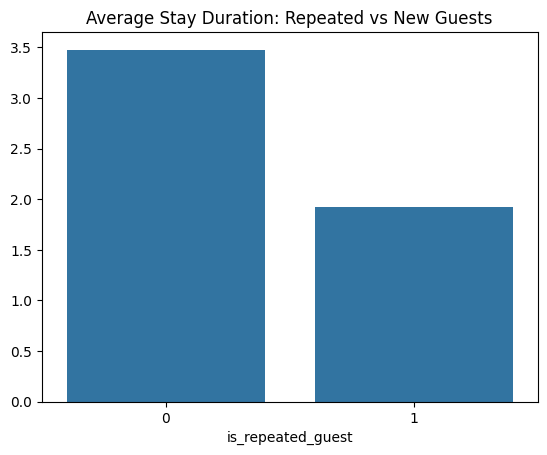

In [35]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
stay_comparison = df.groupby('is_repeated_guest')['total_stay'].mean()
print(stay_comparison)
sns.barplot(x=stay_comparison.index, y=stay_comparison.values)
plt.title("Average Stay Duration: Repeated vs New Guests")
plt.show()


Which room type has the highest number of bookings?

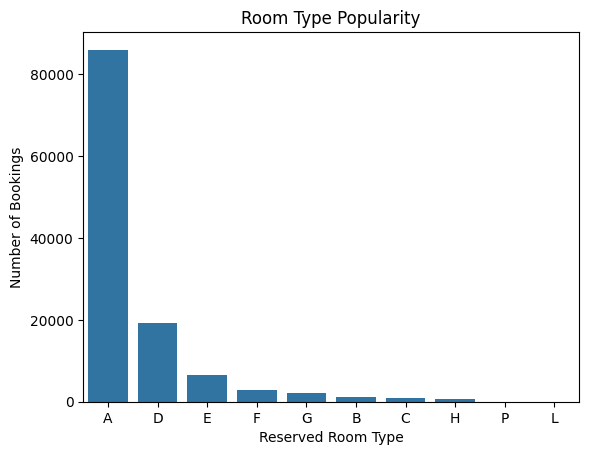

In [36]:
room_counts = df['reserved_room_type'].value_counts()
sns.barplot(x=room_counts.index, y=room_counts.values)
plt.title("Room Type Popularity")
plt.xlabel("Reserved Room Type")
plt.ylabel("Number of Bookings")
plt.show()


             ADVANCED LVL QWESTION

Factors significantly impacting cancellation rate (Feature Importance Idea)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Select relevant columns
cols = ['lead_time', 'booking_changes', 'total_of_special_requests',
        'previous_cancellations', 'adr', 'is_canceled']

df_model = df[cols].dropna()

X = df_model.drop('is_canceled', axis=1)
y = df_model['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

importance = pd.Series(model.coef_[0], index=X.columns)
print(importance.sort_values(ascending=False))


previous_cancellations       1.643243
adr                          0.006751
lead_time                    0.005581
booking_changes             -0.728501
total_of_special_requests   -0.734042
dtype: float64


How ADR varies with adults, children, and babies

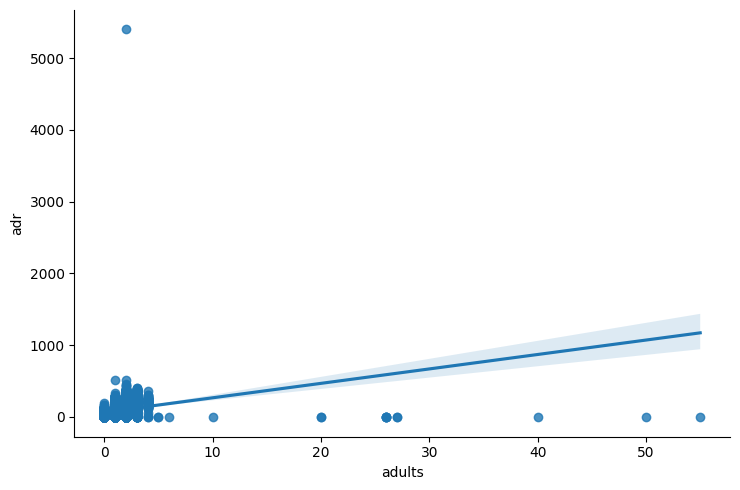

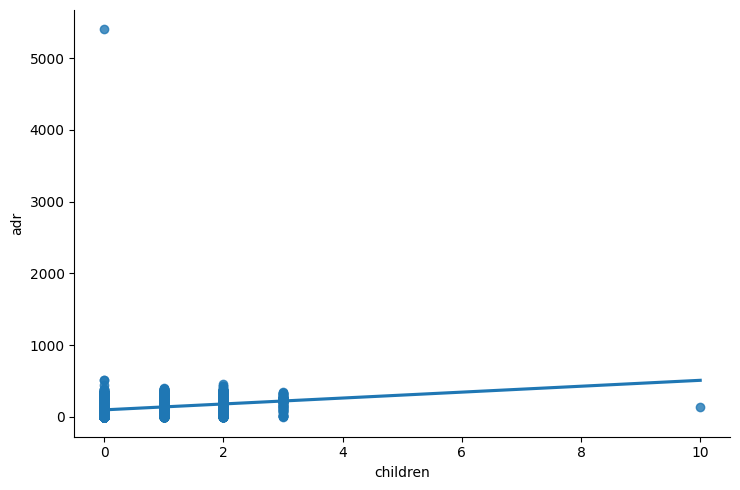

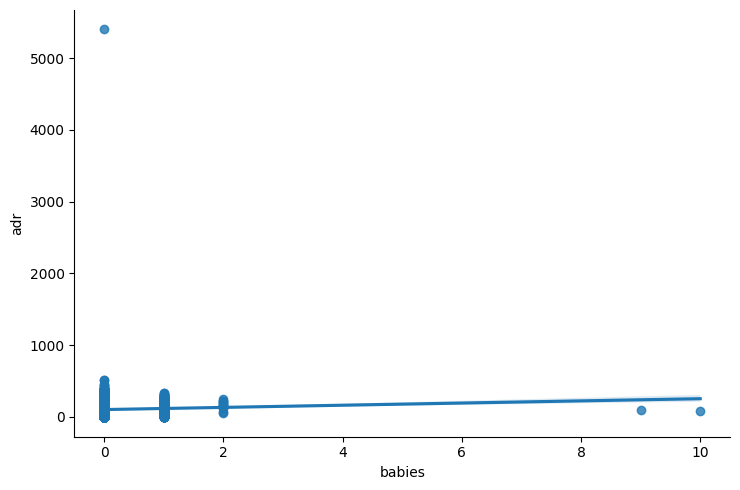

In [38]:
sns.lmplot(x='adults', y='adr', data=df, aspect=1.5)
sns.lmplot(x='children', y='adr', data=df, aspect=1.5)
sns.lmplot(x='babies', y='adr', data=df, aspect=1.5)


Impact of booking changes on special requests

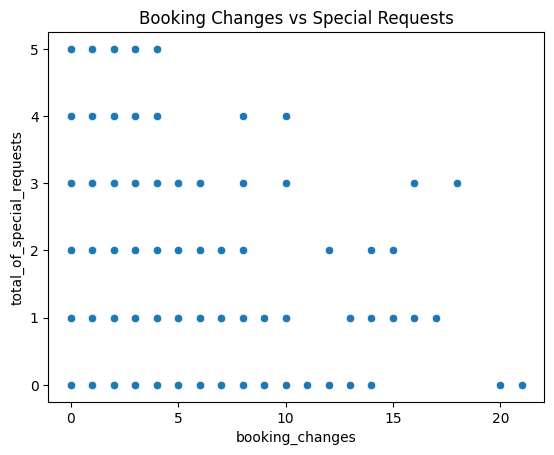

Correlation: 0.05


In [39]:
sns.scatterplot(x='booking_changes', y='total_of_special_requests', data=df)
plt.title("Booking Changes vs Special Requests")
plt.show()

corr = df['booking_changes'].corr(df['total_of_special_requests'])
print("Correlation:", round(corr, 2))


Seasonal impact on booking cancellations

arrival_date_month
June         0.414572
April        0.407972
May          0.396658
September    0.391702
October      0.380466
August       0.377531
July         0.374536
December     0.349705
February     0.334160
March        0.321523
November     0.312334
January      0.304773
Name: is_canceled, dtype: float64


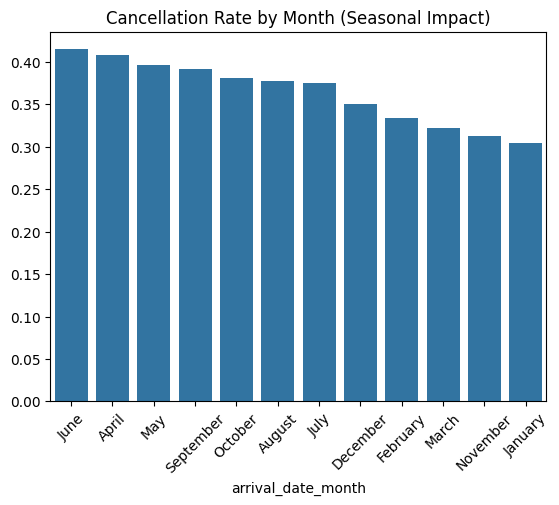

In [40]:
cancel_rate_month = df.groupby('arrival_date_month')['is_canceled'].mean().sort_values(ascending=False)
print(cancel_rate_month)
sns.barplot(x=cancel_rate_month.index, y=cancel_rate_month.values)
plt.title("Cancellation Rate by Month (Seasonal Impact)")
plt.xticks(rotation=45)
plt.show()


Booking lead time distribution by market segment

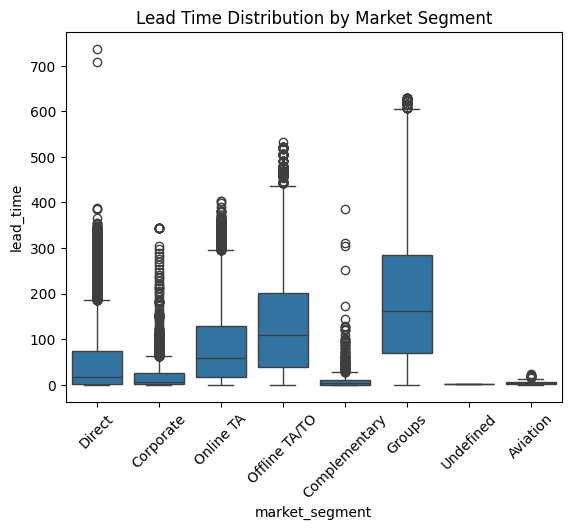

In [41]:
sns.boxplot(x='market_segment', y='lead_time', data=df)
plt.title("Lead Time Distribution by Market Segment")
plt.xticks(rotation=45)
plt.show()


                        OVERALL SUMMARY
      The hotel booking analysis shows that City Hotels get more bookings but also have higher cancellations, especially for long lead-time reservations.
Summer months (July–August) have peak demand, and Resort Hotels have a higher ADR.
Hotels can use these insights to optimize pricing, marketing, and cancellation policies to boost both revenue and guest satisfaction.